<a href="https://colab.research.google.com/github/dniggl/Insights/blob/main/Predict_Stock_Price_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predict Tesla stock prices using the Linear Regression model.    

In [ ]:
# Install yfinance and cartopy packages
!pip install yfinance
!pip install cartopy

# Import software libraries.
import cartopy
import pandas as pd
import yfinance as yf
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# We will use the Yahoo! Finance Market Downloader to get the data for Tesla stock.
tesla = yf.download('TSLA',start='2020-01-07',  end='2021-01-07',progress=False)[['Close']]

In [ ]:
# Print the first 5 rows
tesla.head(5)

,Close
Date,
2020-01-07,93.811996
2020-01-08,98.428001
2020-01-09,96.267998
2020-01-10,95.629997
2020-01-13,104.972000


In [ ]:
# Show information about the data. 
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2020-01-07 to 2021-01-06
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   253 non-null    float64
dtypes: float64(1)
memory usage: 4.0 KB


There are 253 records and 1 columns. The data set contains no null values and float data type.

We need to transform the data so we can feed them into our Machine Learning model. We will restructure our data so that each row contains the actual stock price for one day followed be each of the closing stock prices for the previous 10 days. For example, begining with the 11th row, we will get the previous 10 closing prices and use them for the features. The Pandas shift function will be used to get the close values from each of the previous 10 rows of data. This process will be repeated for each row of data. 

In [ ]:
tesla = pd.concat([tesla, tesla.shift(), tesla.shift(2),tesla.shift(3),tesla.shift(4),tesla.shift(5),
           tesla.shift(6),tesla.shift(7),tesla.shift(8),tesla.shift(9),tesla.shift(10)], axis=1).dropna() 
tesla.columns = list(range(0,11))
tesla.rename(columns={0:'actual_stock_price'},inplace=True)
tesla.head()

,actual_stock_price,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2020-01-22,113.912003,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000,95.629997,96.267998,98.428001,93.811996
2020-01-23,114.440002,113.912003,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000,95.629997,96.267998,98.428001
2020-01-24,112.963997,114.440002,113.912003,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000,95.629997,96.267998
2020-01-27,111.603996,112.963997,114.440002,113.912003,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000,95.629997
2020-01-28,113.379997,111.603996,112.963997,114.440002,113.912003,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000


In [ ]:
# Split the data into training and test data sets. 
train = tesla.head(len(tesla)-10)
test = tesla.tail(10)
train.head(5)

,actual_stock_price,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2020-01-22,113.912003,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000,95.629997,96.267998,98.428001,93.811996
2020-01-23,114.440002,113.912003,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000,95.629997,96.267998,98.428001
2020-01-24,112.963997,114.440002,113.912003,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000,95.629997,96.267998
2020-01-27,111.603996,112.963997,114.440002,113.912003,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000,95.629997
2020-01-28,113.379997,111.603996,112.963997,114.440002,113.912003,109.440002,102.099998,102.697998,103.699997,107.584000,104.972000


In [ ]:
test.head(11)

,actual_stock_price,1,2,3,4,5,6,7,8,9,10
Date,,,,,,,,,,,
2020-12-22,640.340027,649.859985,695.000000,655.900024,622.770020,633.250000,639.830017,609.989990,627.070007,604.479980,649.880005
2020-12-23,645.979980,640.340027,649.859985,695.000000,655.900024,622.770020,633.250000,639.830017,609.989990,627.070007,604.479980
2020-12-24,661.770020,645.979980,640.340027,649.859985,695.000000,655.900024,622.770020,633.250000,639.830017,609.989990,627.070007
2020-12-28,663.690002,661.770020,645.979980,640.340027,649.859985,695.000000,655.900024,622.770020,633.250000,639.830017,609.989990
2020-12-29,665.989990,663.690002,661.770020,645.979980,640.340027,649.859985,695.000000,655.900024,622.770020,633.250000,639.830017
2020-12-30,694.780029,665.989990,663.690002,661.770020,645.979980,640.340027,649.859985,695.000000,655.900024,622.770020,633.250000
2020-12-31,705.669983,694.780029,665.989990,663.690002,661.770020,645.979980,640.340027,649.859985,695.000000,655.900024,622.770020
2021-01-04,729.770020,705.669983,694.780029,665.989990,663.690002,661.770020,645.979980,640.340027,649.859985,695.000000,655.900024
2021-01-05,735.109985,729.770020,705.669983,694.780029,665.989990,663.690002,661.770020,645.979980,640.340027,649.859985,695.000000


In [ ]:
# Import the Lineear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

In [ ]:
# Create the model object.
LR = LinearRegression()

# Train the model on the training data.
LR.fit(train[list(range(1,11))],train['actual_stock_price'])

# Make predictions on the test data.
test['predictions'] = LR.predict(test[list(range(1,11))]) 

<Figure size 864x504 with 0 Axes>

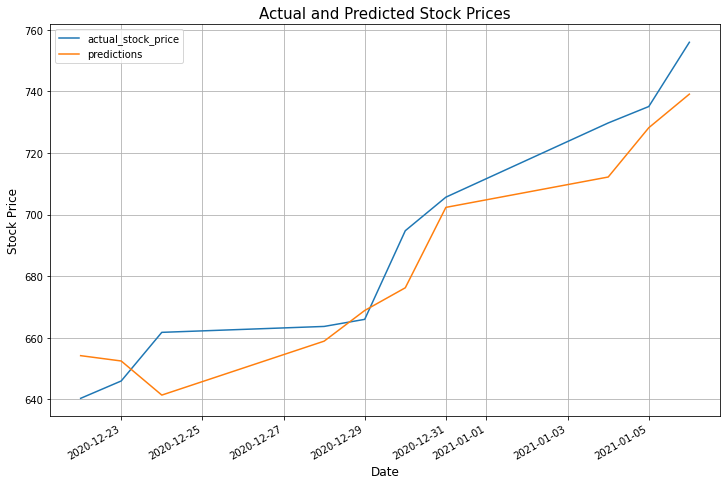

In [ ]:
# Visualize the actual stock price and the predicted stock price over time.
plt.figure(figsize=(12,7))
ax = test[['actual_stock_price','predictions']].plot(figsize=(12,8))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Stock Price', fontsize=12)
plt.title('Actual and Predicted Stock Prices', fontsize=15)
plt.grid()
plt.show()

Conclusion: The predicted stock prices and the actual stock prices are quite close to each other over these time periods. It appears that the predicted stock prices are slightly lower than the actual closing stock prices.   